<a href="https://colab.research.google.com/github/ShahzebFarruk/SYSC_5500_DDoS_Attack_Detection_Using_ML_Grp_6/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DDoS Train Data(Test+).csv to DDoS Train Data(Test+) (1).csv


In [ ]:
import io
import pandas as pd
dftr = pd.read_csv(io.BytesIO(uploaded['DDoS Train Data(Test+).csv']))


In [ ]:
pip install category_encoders

In [ ]:
pip install feature_engine

In [ ]:
from feature_engine import categorical_encoders as ce
encoder=ce.CountFrequencyCategoricalEncoder(encoding_method='frequency',
                         variables=['protocol_type','service','flag'])
dftr_enc=encoder.fit_transform(dftr[['protocol_type','service','flag']])
encoder.fit_transform(dftr)
dftr_enc=encoder.transform(dftr)


In [ ]:
dftr_enc

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,Column43
0,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,0.837473,0.037748,0.659821,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,0.046265,0.011622,0.659821,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,0.837473,0.072126,0.034289,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,0.837473,0.041430,0.659821,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,0.837473,0.348341,0.659821,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,0.837473,0.348341,0.659821,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,0.116262,0.039656,0.659821,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
dftr['outcome'] = class_le.fit_transform(dftr['outcome'].values)

In [ ]:
dftr['outcome']

0        14
1        14
2        16
3        24
4        11
         ..
22539    16
22540    16
22541     1
22542    16
22543    11
Name: outcome, Length: 22544, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
df3=dftr_enc.drop(['outcome'], axis=1)
target=dftr['outcome']
df3=dftr_enc.drop(['outcome'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(df3, target, test_size=0.33)


In [ ]:
target

0        14
1        14
2        16
3        24
4        11
         ..
22539    16
22540    16
22541     1
22542    16
22543    11
Name: outcome, Length: 22544, dtype: int64

In [ ]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Column43
13764,0,0.837473,0.348341,0.659821,244,4930,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,9,0.00,0.00,0.00,0.00,1.00,0.00,0.00,166,255,1.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,21
7887,280,0.837473,0.037748,0.659821,283618,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,15,15,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,14
6924,0,0.837473,0.348341,0.659821,282,478,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13,13,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,21
12922,0,0.837473,0.348341,0.659821,253,5940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,18,0.00,0.00,0.00,0.00,1.00,0.00,0.17,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
1692,0,0.837473,0.348341,0.659821,339,397,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,21,0.00,0.00,0.00,0.00,1.00,0.00,0.10,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15421,0,0.116262,0.039656,0.659821,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,224,0.00,0.00,0.00,0.00,1.00,0.00,0.01,255,255,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,18
2734,0,0.837473,0.001641,0.034289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,4,0.00,0.00,1.00,1.00,0.02,0.06,0.00,255,4,0.02,0.07,0.00,0.00,0.00,0.00,1.00,1.00,18
18781,0,0.837473,0.037172,0.170777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,458,1,0.15,0.00,0.85,1.00,0.00,1.00,0.00,255,1,0.00,0.92,0.00,0.00,0.14,0.00,0.86,1.00,18
8620,1019,0.837473,0.348341,0.029675,3944,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,86,86,0.01,0.01,0.98,0.98,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.33,0.33,14


In [ ]:
Y_train

13764    16
7887     33
6924     16
12922    16
1692     16
         ..
15421    16
2734     14
18781    25
8620      0
12274    16
Name: outcome, Length: 15104, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
df4=StandardScaler().fit_transform(df3)
#X_train=StandardScaler().fit_transform(X_train)
#X_test=StandardScaler().fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train)
y_pred1=neigh.predict(X_test)
print((accuracy_score(y_pred1,Y_test))*100,'%')

96.73387096774194 %


In [ ]:
from sklearn.metrics import recall_score
recall_score(Y_test, y_pred1, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6641858216916113

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred1, average='macro')

0.6486956531706856

In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
y_pred2=gnb.predict(X_test)
print((accuracy_score(y_pred2,Y_test))*100,'%')

42.74193548387097 %


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print((accuracy_score(y_pred3,Y_test))*100,'%')

86.19623655913978 %


In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred1, average='macro')

0.6486956531706856

In [ ]:
from sklearn.metrics import recall_score, precision_score
recall_score(Y_test, y_pred1, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6641858216916113

In [ ]:
precision_score(Y_test,y_pred1, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6484702841616664

In [ ]:
train_x,val_x,train_y,val_y=train_test_split(X_train,Y_train,test_size=0.2,random_state=0)

In [ ]:
val_x.shape

(3021, 42)

In [ ]:
val_y.shape

(3021,)

In [ ]:
print(train_x.shape,val_x.shape)

(12083, 42) (3021, 42)


In [ ]:
columns=df3.columns  #DEEPTI CHECK THIS i think isn't it a keyword later conflicting?

In [ ]:
#model1 = KNeighborsClassifier(n_neighbors=3)
#model1.fit(train_x, train_y)
#y_val_pred1=model1.predict(val_x)
#y_val_pred1=pd.DataFrame(y_val_pred1)
#y_test_pred1=neigh.predict(X_test)
#y_test_pred1=pd.DataFrame(y_test_pred1)

In [ ]:
#model2 = GaussianNB()
#model2.fit(train_x,train_y)
#y_val_pred2=model2.predict(val_x)
#y_val_pred2=pd.DataFrame(y_val_pred2)
#y_test_pred2=model2.predict(X_test)
#_test_pred2=pd.DataFrame(y_test_pred2)


In [ ]:
#model3 = BernoulliNB()
#model3.fit(train_x,train_y)
#y_val_pred3=model3.predict(val_x)
#y_val_pred3=pd.DataFrame(y_val_pred3)
#y_test_pred3=model3.predict(X_test)
#y_test_pred3=pd.DataFrame(y_test_pred3)

In [ ]:
val_input=pd.concat([pd.DataFrame(val_x,columns= columns), y_val_pred1, y_val_pred2, y_val_pred3],axis=1)
test_input=pd.concat([pd.DataFrame(X_test,columns= columns), y_test_pred1, y_test_pred2,y_test_pred3],axis=1)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=200)



In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(val_input)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [ ]:
import pandas
val_input1=imp.transform(val_input)
val_input1=pandas.DataFrame(val_input1)

In [ ]:
val_input.astype('float32').dtypes

duration                       float32
protocol_type                  float32
service                        float32
flag                           float32
src_bytes                      float32
dst_bytes                      float32
land                           float32
wrong_fragment                 float32
urgent                         float32
hot                            float32
num_failed_logins              float32
logged_in                      float32
num_compromised                float32
root_shell                     float32
su_attempted                   float32
num_root                       float32
num_file_creations             float32
num_shells                     float32
num_access_files               float32
num_outbound_cmds              float32
is_host_login                  float32
is_guest_login                 float32
count                          float32
srv_count                      float32
serror_rate                    float32
srv_serror_rate          

In [ ]:
val_input1.shape

(3021, 45)

In [ ]:
val_y.shape

(3021,)

In [ ]:
val_input = val_input.fillna(val_input.mean())

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
import sklearn.metrics as metrics

In [ ]:


k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

print(scores)

[0.9673387096774193, 0.9647849462365592, 0.9657258064516129, 0.9626344086021505, 0.9598118279569893, 0.9576612903225806, 0.9547043010752688, 0.9533602150537634, 0.9520161290322581, 0.9508064516129032, 0.948252688172043, 0.9473118279569892, 0.9444892473118279, 0.9432795698924731, 0.9413978494623656, 0.9393817204301075, 0.9369623655913979, 0.9364247311827957, 0.9348118279569892, 0.9334677419354839, 0.9323924731182796, 0.9311827956989247, 0.9290322580645162, 0.9288978494623656, 0.9288978494623656]


In [ ]:
len(scores)

Text(0, 0.5, 'Testing Accuracy')

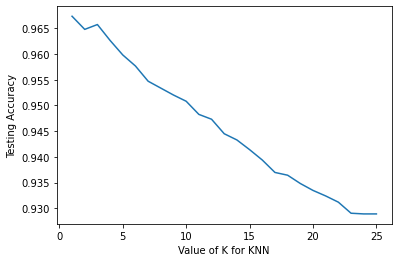

In [ ]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

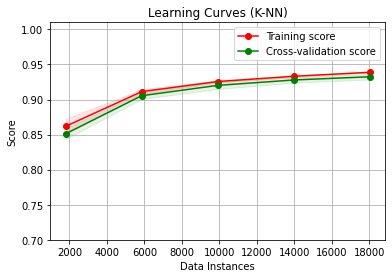

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Data Instances")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#digits = load_digits()
X, y = df3, target


title = "Learning Curves (K-NN)"
# 
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = knn# KNN(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()